<a href="https://colab.research.google.com/github/Ezendos/paszi/blob/master/Mathematics.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory" target="_blank"></a>

# Mathematics

## Математика в Python

Python — универсальный язык программирования, и поэтому его часто используют для решения математических задач. Он включает встроенные типы для работы c целыми числами и числами c плавающей точкой, пригодные для выполнения базовых математических вычислений, c которыми приходится сталкиваться в типичных приложениях. В случаях, когда предъявляются повышенные требования к точности расчетов или появляется необходимость провести более сложные математические операции, стандартная библиотека реализует дополнительные возможности в виде следующих модулей:

## decimal

При работе с числами с плавающей точкой мы сталкиваемся с тем, что в результате вычислений получаем результат не совсем верный с человеческой точки зрения:

In [3]:
0.1 + 0.2 == 0.3

False

Такое поведение объясняется особенностями реализации `float` обычно соответствующее стандарту IEEE 754 и аппаратно реализуемое в современных компьютерах.

In [4]:
a = 0.1 + 0.2
a

0.30000000000000004

### IEEE-754

Число одинарной точности (32-bit)

![float](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d2/Float_example.svg/590px-Float_example.svg.png)

Число двойной точности (64-bit)

![double](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/IEEE_754_Double_Floating_Point_Format.svg/618px-IEEE_754_Double_Floating_Point_Format.svg.png)

В расчетах, требующих повышенную точность предпочтительнее использовать десятичные числа с фиксированной точкой.

Модуль `decimal` реализует арифметику чисел c фиксированной точностью и чисел c плавающей точкой c использованием модели, понятной большинству людей. Экземпляр `Decimal` обеспечивает точное представление любого числа, c округлением как вниз, так и вверх, используя заданное предельное значение количества значащих цифр.

Ключевым компонентом для работы с числами в этом модуле является класс `Decimal`. Создаем объект с помощью конструктора, после чего его можно использовать в арифметических операциях.

In [5]:
from decimal import *
getcontext().prec = 3 # по умолчанию 28
a = 0.1 + 0.2
b = Decimal("0.1") + Decimal("0.2")
b

Decimal('0.3')

In [6]:
float(b)
b

Decimal('0.3')

Изменять поведение модуля `decimal` можно при помощи *контекста*. Контекст  определяет точность, правила округления, ограничения на экспоненты, флаги результатов операций и средства активации исключений. Контексты могут применяться ко всем
экземплярам `Decimal` как в потоке, так и локально, в пределах небольшого участка кода. 

За контекст отвечает функция `getcontext()`

Атрибут `prec` управляет точностью, поддерживаемой для новых значений, которые создаются в результате выполнения математических операций. Значение `prec` не изменяет количество значимых цифр вводимого числа, но обязательно изменит его после выполнения математических операций. По умолчанию `prec` равна 28.

In [7]:
getcontext().prec = 5
Decimal('1.23456789')

Decimal('1.23456789')

In [8]:
getcontext().prec = 5
1*Decimal('1.23456789')

Decimal('1.2346')

In [9]:
getcontext().prec = 5
Decimal('1.23456789') - Decimal('0.23456789')

Decimal('1.0000')

Извлечение текущего глобального контекста:

In [10]:
getcontext()

Context(prec=28, rounding=ROUND_HALF_EVEN, Emin=-999999, Emax=999999, capitals=1, clamp=0, flags=[], traps=[InvalidOperation, DivisionByZero, Overflow])

Возможная ошибка в применеии конструктора `decimal` - не использовать строку в аргументе при вводе чисел с точкой. 

Важно понимать, что если задано число с плавающей точкой, то его двоичное представление преобразуется без потерь в точный десятичный эквивалент.

In [34]:
from decimal import *

c = Decimal(0.1) + Decimal(0.2)
c

Decimal('0.3000000000000000166533453694')

In [12]:
c = float(c)
c

0.30000000000000004

In [13]:
0.1 + 0.2  == c

True

Некоторые математические функции реализованы как методы класса `Decimal`

In [14]:
Decimal(3).sqrt()

Decimal('1.732050807568877293527446342')

In [15]:
Decimal('2.718281').ln()

Decimal('0.9999996952269029620733811293')

In [16]:
Decimal(1).exp()

Decimal('2.718281828459045235360287471')

In [17]:
Decimal(1001).log10()

Decimal('3.000434077479318640668921388')

Метод `quantize()` округляет число представленное объектом `decimal`.

В качестве первого аргумента передается также объект `Decimal`, который указывает формат округления числа.

Вторым аргументом является одна из констант, определяющая правило округления.

In [18]:
Decimal('7.325').quantize(Decimal('.01'), rounding=ROUND_DOWN)

Decimal('7.32')

In [19]:
Decimal('7.325').quantize(Decimal('1.'), rounding=ROUND_UP)

Decimal('8')

## fractions

Модуль `fractions` позволяет выполнять арифметические действия над рациональными числами. Модуль предоставляет класс рациональных чисел `Fraction`, экземпляры которого могут создаваться на основе двух целых чисел, другого рационального числа или строки. Экземпляры класса `Fraction` имеют свойства числитель (`numerator`) и знаменатель (`denominator`).

Сосздадим несколько экземпляров дробей123

In [20]:
from fractions import *
Fraction()    #  по умолчанию numerator=0, denominator=1

Fraction(0, 1)

In [21]:
Fraction(numerator=1, denominator=2)    #  равносильно Fraction(1, 2)

Fraction(1, 2)

Если числитель и знаменатель имеют общие делители, то перед созданием рационального числа они будут сокращены:

In [22]:
Fraction(8, 16), Fraction(15, 30)

(Fraction(1, 2), Fraction(1, 2))

Полезным свойством экземпляров `Fraction` является возможность преобразования чисел c плавающей точкой в приближенную рациональную дробь. Это реализуется при помощи метода `limit_denominator(max_denominator)`, где `max_denominator` определеяет максимальное значение знаменателя дроби.

In [23]:
Fraction('3.1415926535897932').limit_denominator(100)

Fraction(311, 99)

## random

Модуль `random` предоставляет быстрый генератор псевдослучайных чисел, основанный на алгоритме под названием *вихрь Мерсенна*. Этот алгоритм, первоначально разработанный для расчетов методом Монте-Карло, генерирует числа, подчиняющиеся равномерному распределению c большим периодом повторения, что делает его весьма удобным для широкого ряда приложений.

Сразу стоит отметить, что данный модуль **совершенно не годится для криптографии**, так как генератор абсолютно детерминирован (каждое последующее его состояние, предопределено предыдущим состоянием). Это, впрочем, не должно сильно повлиять на научные расчеты или игровые механизмы.

## math

Модуль `math` реализует многие из специальных функций, специфицированных стандартом IEEE, которые обычно содержатся в платформозависимых библиотеках C и предназначены для выполнения сложных математических операций c использованием значений c плавающей точкой, включая логарифмические и тригонометрические операции. Несмотря на то что числа комплексного типа `complex` являются встроенными, данный модуль их не поддерживает и всегда вызывает исключение при их использовании. Для того что бы использовать математические функции с комплексными числами обратитесь к модулю `cmath`.

Ниже приведён список констант `math`, точность которых ограничена только точностью чисел c плавающей точкой в соответствии c установленной на данной платформе библиотекой C.

In [24]:
import math
print(' pi: {:.30f}'.format(math.pi))
print(' e: {:.30f}'.format(math.e))
print(' tau: {:.30f}'.format(math.tau))
print('nan: {:.30f}'.format(math.nan))
print('inf: {:.30f}'.format(math.inf))

 pi: 3.141592653589793115997963468544
 e: 2.718281828459045090795598298428
 tau: 6.283185307179586231995926937088
nan: nan
inf: inf


Не следует использовать оператор == для сравнения чисел с плавающей точкой. 

Вместо == стоит применять функцию **mаth.isсlоsе(х, у)**

In [25]:
a = 0.1 + 0.2
b = 0.3
a == b

False

In [26]:
math.isclose(a,b)

True

## statistics

Модуль `statistics` реализует базовые статистические формулы, обеспечивающие проведение вычислений c использованием различных числовых типов Python (`int`, `float`, `Decimal` и `Fraction`). Очевидно, этот модуль не является конкурентом таким библиотекам как NumPy или SciPy.

### Показатели центра распределения
Cреднее значение (арифметическое, геометрическое, гармоническое), медиана, мода.

In [27]:
from statistics import *
data = [1, 2, 2, 5, 10, 12, 15, 44]
print('Среднее арифметическое: {:0.2f}'.format(mean(data)))
print('Среднее геометрическое: {:0.2f}'.format(geometric_mean(data)))
print('Среднее гармоническое: {:0.2f}'.format(harmonic_mean(data)))
print('Медиана: {:0.2f}'.format(median(data)))
print('Мода: {:0.2f}'.format(mode(data)))

Среднее арифметическое: 11.38
Среднее геометрическое: 5.96
Среднее гармоническое: 3.24
Медиана: 7.50
Мода: 2.00


Дисперсия и стандартное отклонение

Для выражения степени разброса значений относительно среднего по набору статистики используют две характеристики. Дисперсия — это среднее значение квадрата разности между каждым из значений и средним, а стандартное отклонение — это квадратный корень из дисперсии. Большие значения дисперсии или стандартного отклонения означают большую степень разброса данных в наборе, тогда как их небольшие значения свидетельствуют о кластеризации данных вокруг среднего значения.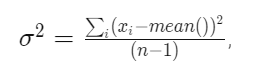

In [35]:
data = [0.0, 0.25, 0.25, 1.25, 1.5, 1.75, 2.75, 3.25]
variance(data)

1.4285714285714286

In [34]:
stdev([1.5, 2.5, 2.5, 2.75, 3.25, 4.75])

1.0810874155219827

## Источники и ссылки:

[Семён Лукашевский - pyprog.pro - Справочник по стандартной библиотеке языка Python](https://pyprog.pro/python/st_lib/standart_library.html)

Даг Хеллман - Стандартная библиотека Python 3. Справочник с примерами

[docs.python.org](https://docs.python.org)